In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

# Load cleaned datasets
matches = pd.read_csv("../data/matches_clean.csv")
deliveries = pd.read_csv("../data/deliveries_clean.csv")



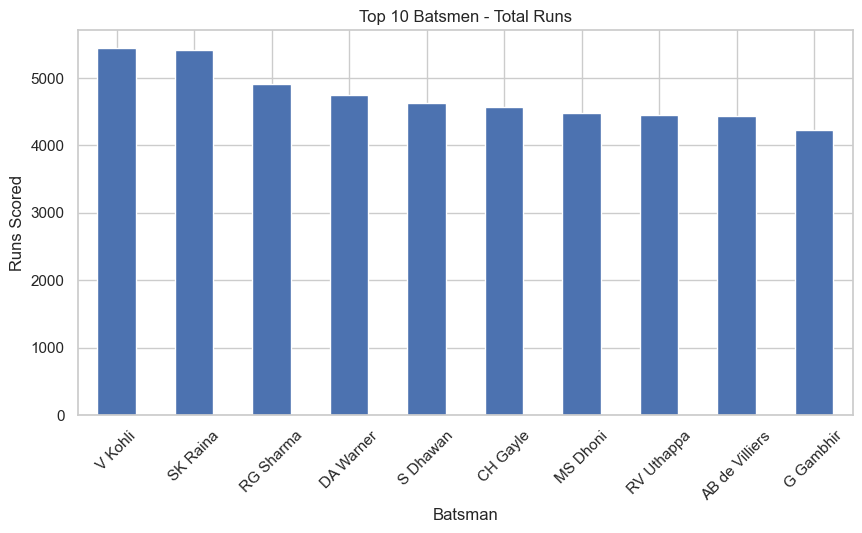

In [4]:
top_batsmen = deliveries.groupby("batsman")["batsman_runs"].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,5))
top_batsmen.plot(kind="bar")
plt.title("Top 10 Batsmen - Total Runs")
plt.ylabel("Runs Scored")
plt.xlabel("Batsman")
plt.xticks(rotation=45)
plt.show()


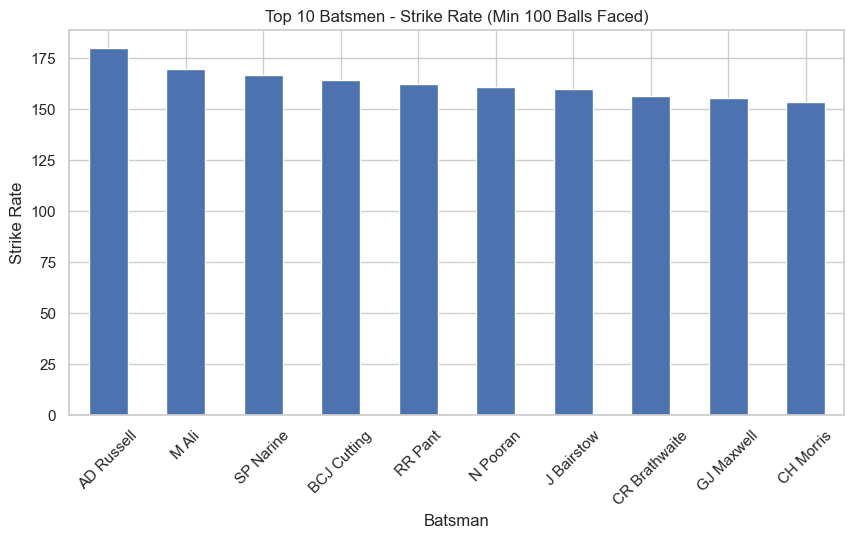

In [5]:
# Group by batsman: total runs and balls faced
batsman_stats = deliveries.groupby("batsman").agg(
    runs=("batsman_runs", "sum"),
    balls=("ball", "count")
)

# Calculate Strike Rate
batsman_stats["strike_rate"] = (batsman_stats["runs"] / batsman_stats["balls"]) * 100

# Filter top 10 by strike rate (minimum 100 balls faced for relevance)
top_strike_rate = batsman_stats[batsman_stats["balls"] >= 100].sort_values("strike_rate", ascending=False).head(10)

# Plot
plt.figure(figsize=(10,5))
top_strike_rate["strike_rate"].plot(kind="bar")
plt.title("Top 10 Batsmen - Strike Rate (Min 100 Balls Faced)")
plt.ylabel("Strike Rate")
plt.xlabel("Batsman")
plt.xticks(rotation=45)
plt.show()


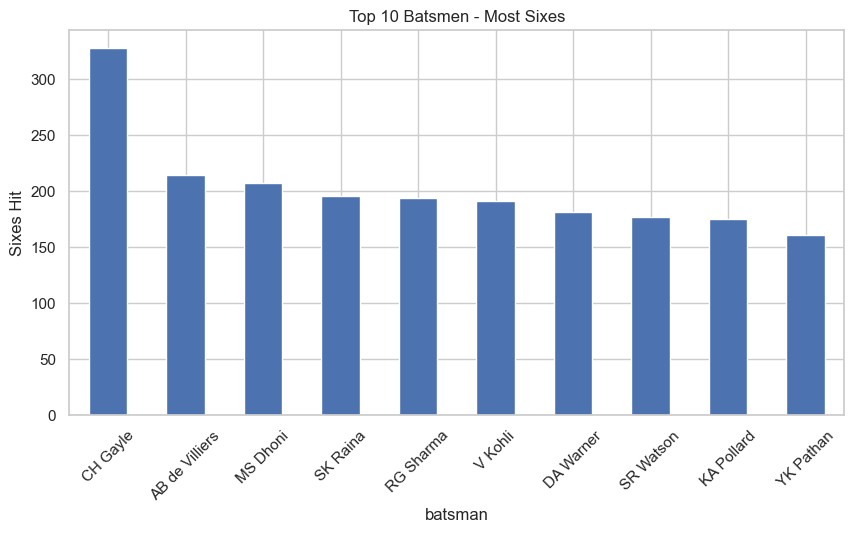

In [6]:
sixes = deliveries[deliveries["batsman_runs"] == 6] \
        .groupby("batsman")["batsman_runs"] \
        .count().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,5))
sixes.plot(kind="bar")
plt.title("Top 10 Batsmen - Most Sixes")
plt.ylabel("Sixes Hit")
plt.xticks(rotation=45)
plt.show()


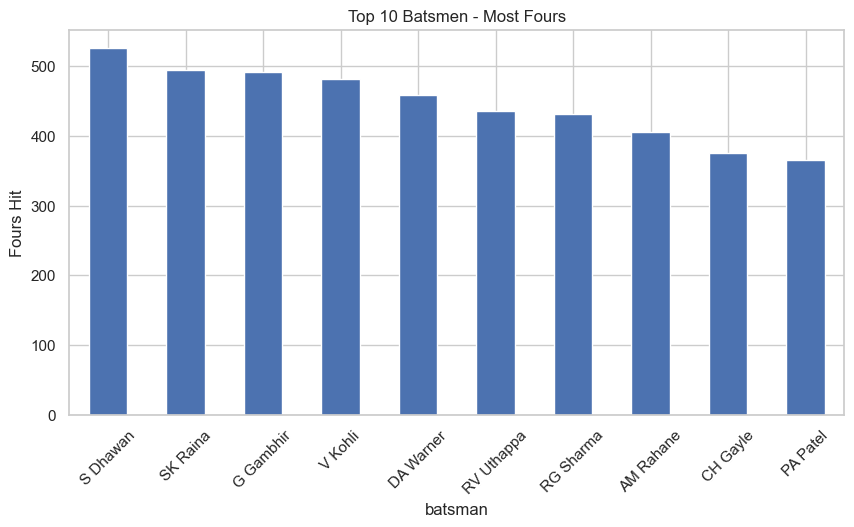

In [7]:
fours = deliveries[deliveries["batsman_runs"] == 4] \
        .groupby("batsman")["batsman_runs"] \
        .count().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,5))
fours.plot(kind="bar")
plt.title("Top 10 Batsmen - Most Fours")
plt.ylabel("Fours Hit")
plt.xticks(rotation=45)
plt.show()


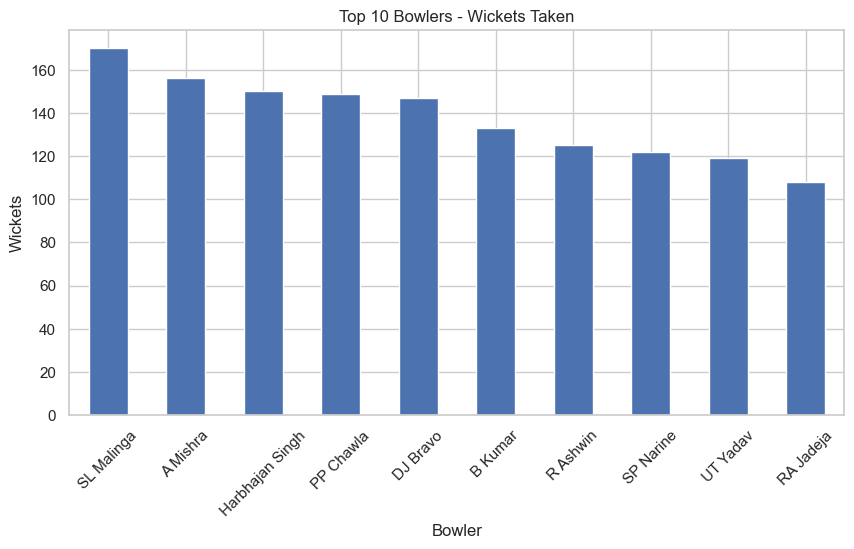

In [8]:
# Create a column for wickets (exclude run-outs)
deliveries['is_wicket'] = deliveries['dismissal_kind'].notna() & (deliveries['dismissal_kind'] != 'run out')

# Group by bowler
top_bowlers = deliveries.groupby("bowler")['is_wicket'].sum().sort_values(ascending=False).head(10)

# Plot
plt.figure(figsize=(10,5))
top_bowlers.plot(kind='bar')
plt.title("Top 10 Bowlers - Wickets Taken")
plt.ylabel("Wickets")
plt.xlabel("Bowler")
plt.xticks(rotation=45)
plt.show()


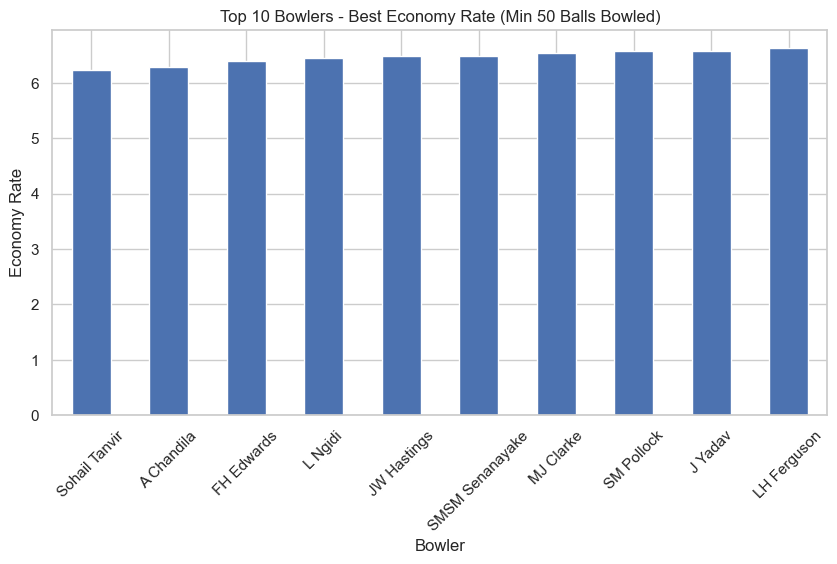

In [9]:
# Group by bowler: total runs and balls bowled
bowler_stats = deliveries.groupby("bowler").agg(
    runs_conceded=('total_runs', 'sum'),
    balls_bowled=('ball', 'count')
)

# Convert balls to overs
bowler_stats['overs'] = bowler_stats['balls_bowled'] / 6

# Calculate economy rate
bowler_stats['economy'] = bowler_stats['runs_conceded'] / bowler_stats['overs']

# Top 10 best economy (min 50 balls bowled)
top_economy = bowler_stats[bowler_stats['balls_bowled'] >= 50].sort_values('economy').head(10)

# Plot
plt.figure(figsize=(10,5))
top_economy['economy'].plot(kind='bar')
plt.title("Top 10 Bowlers - Best Economy Rate (Min 50 Balls Bowled)")
plt.ylabel("Economy Rate")
plt.xlabel("Bowler")
plt.xticks(rotation=45)
plt.show()


C:\Users\Acer\AppData\Local\Temp\ipykernel_21284\2163842894.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bowler_stats_filtered['strike_rate'] = bowler_stats_filtered['balls_bowled'] / bowler_stats_filtered['wickets']


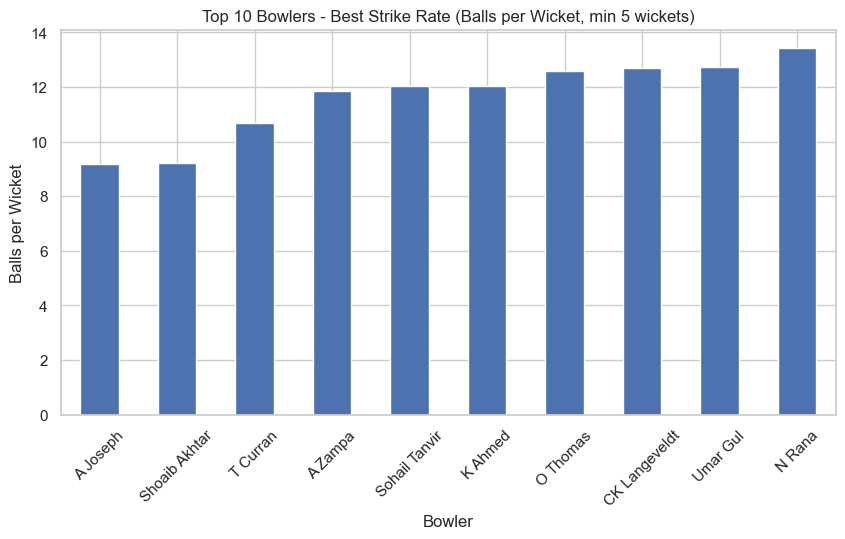

In [10]:
bowler_stats['wickets'] = deliveries.groupby('bowler')['is_wicket'].sum()

# Filter for bowlers with at least 5 wickets
bowler_stats_filtered = bowler_stats[bowler_stats['wickets'] >= 5]

bowler_stats_filtered['strike_rate'] = bowler_stats_filtered['balls_bowled'] / bowler_stats_filtered['wickets']

top_bowler_sr = bowler_stats_filtered.sort_values('strike_rate').head(10)

plt.figure(figsize=(10,5))
top_bowler_sr['strike_rate'].plot(kind='bar')
plt.title("Top 10 Bowlers - Best Strike Rate (Balls per Wicket, min 5 wickets)")
plt.ylabel("Balls per Wicket")
plt.xlabel("Bowler")
plt.xticks(rotation=45)
plt.show()
